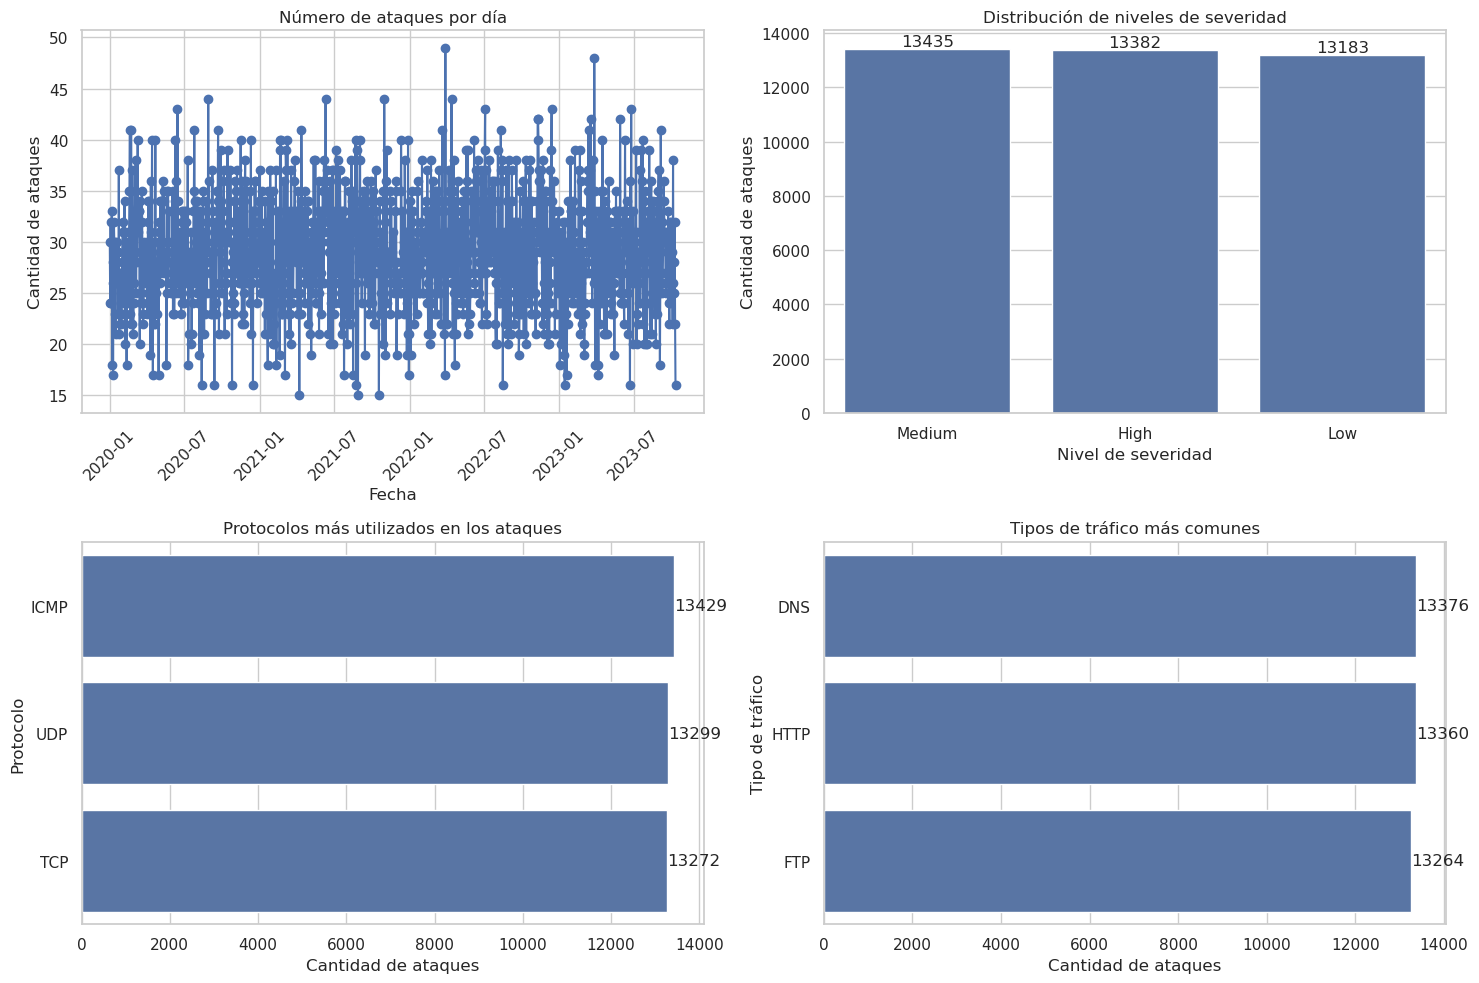

✅ Visualizaciones generadas correctamente.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub  # Asegúrate de tener kagglehub instalado pip install kagglehub

# Descargar dataset desde Kaggle
path = kagglehub.dataset_download("teamincribo/cyber-security-attacks")

# Cargar archivo CSV (puedes ajustar el nombre si es diferente)
df = pd.read_csv(f"{path}/cybersecurity_attacks.csv")

# Convertir 'Timestamp' a datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Configuración general
sns.set(style="whitegrid")


fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Número de ataques por día
eventos_diarios = df.resample('D', on='Timestamp').size()
axes[0, 0].plot(eventos_diarios.index, eventos_diarios.values, marker='o', linestyle='-', color='b')
axes[0, 0].set_title("Número de ataques por día")
axes[0, 0].set_xlabel("Fecha")
axes[0, 0].set_ylabel("Cantidad de ataques")
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. Distribución de niveles de severidad
ax2 = sns.countplot(x="Severity Level", data=df, order=df["Severity Level"].value_counts().index, ax=axes[0, 1])
axes[0, 1].set_title("Distribución de niveles de severidad")
axes[0, 1].set_xlabel("Nivel de severidad")
axes[0, 1].set_ylabel("Cantidad de ataques")

# Agregar etiquetas con el número de ataques
for container in ax2.containers:
    ax2.bar_label(container, fmt="%d", label_type="edge")

# 3. Protocolos más utilizados
ax3 = sns.countplot(y="Protocol", data=df, order=df["Protocol"].value_counts().index, ax=axes[1, 0])
axes[1, 0].set_title("Protocolos más utilizados en los ataques")
axes[1, 0].set_xlabel("Cantidad de ataques")
axes[1, 0].set_ylabel("Protocolo")

# Agregar etiquetas con el número de ataques
for container in ax3.containers:
    ax3.bar_label(container, fmt="%d", label_type="edge")

# 4. Tipos de tráfico más comunes
ax4 = sns.countplot(y="Traffic Type", data=df, order=df["Traffic Type"].value_counts().index, ax=axes[1, 1])
axes[1, 1].set_title("Tipos de tráfico más comunes")
axes[1, 1].set_xlabel("Cantidad de ataques")
axes[1, 1].set_ylabel("Tipo de tráfico")

# Agregar etiquetas con el número de ataques
for container in ax4.containers:
    ax4.bar_label(container, fmt="%d", label_type="edge")


# Ajustes finales
plt.tight_layout()
plt.savefig('dashboard_cyberseguridad_kaggle.png')
plt.show()

print("✅ Visualizaciones generadas correctamente.")
